In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable


1.b Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable


In [ ]:
telecom1=pd.read_csv("/content/TelcomCustomer-Churn_1.csv")
telecom2=pd.read_csv("/content/TelcomCustomer-Churn_2.csv")

Merge both the DataFrames on key ‘customerID’ to form a single DataFrame


In [ ]:
df = pd.merge(telecom1, telecom2, on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [ ]:
all_columns_incorporated = all(col in df.columns for col in telecom1.columns.union(telecom2.columns))

print("Verification: ", all_columns_incorporated)

Verification:  True


 Impute missing/unexpected values in the DataFrame

In [ ]:
df = df.replace('', pd.NA).dropna(how='any')
df = df.replace('NaN', pd.NA).dropna(how='any')
df.dropna(axis=0, inplace=True)

Make sure all the variables with continuous values are of ‘Float’ type [For Example: MonthlyCharges, TotalCharges]

In [ ]:
continuous_columns=["tenure","MonthlyCharges","TotalCharges"]
for column in continuous_columns:
    if df[column].dtype != 'float64':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column]=df[column].astype("float64")

print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


 Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [ ]:
def plot_categorical_pie_charts(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object','category'])
    for column in categorical_columns:
        value_counts = dataframe[column].value_counts()


        plt.figure(figsize=(8, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C71585', '#7FFFD4', '#FF6347']
)
        plt.title(f'Distribution of {column}')
        plt.axis('equal')
        plt.show()


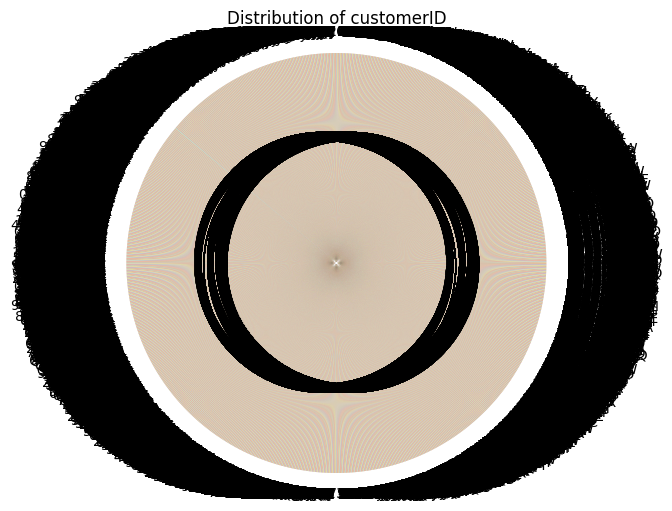

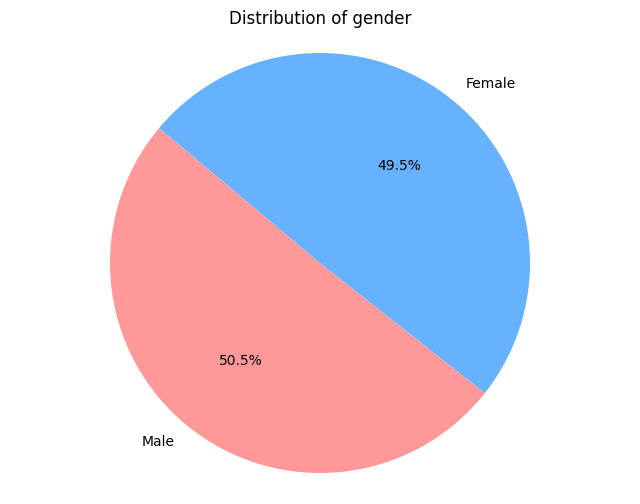

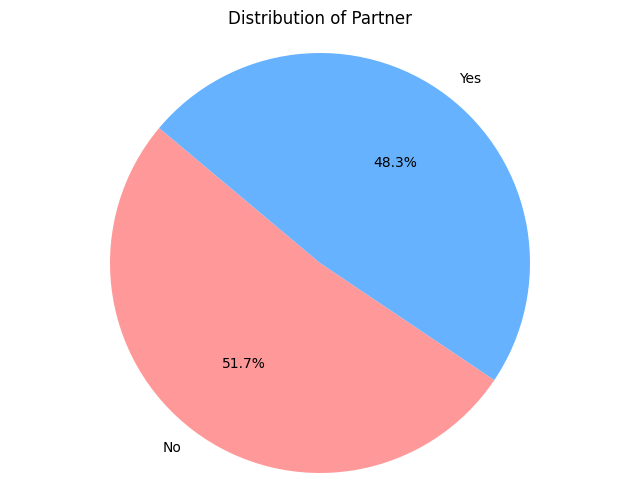

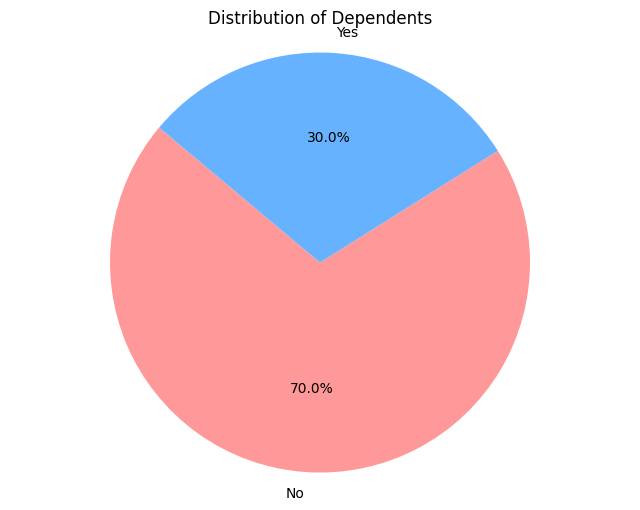

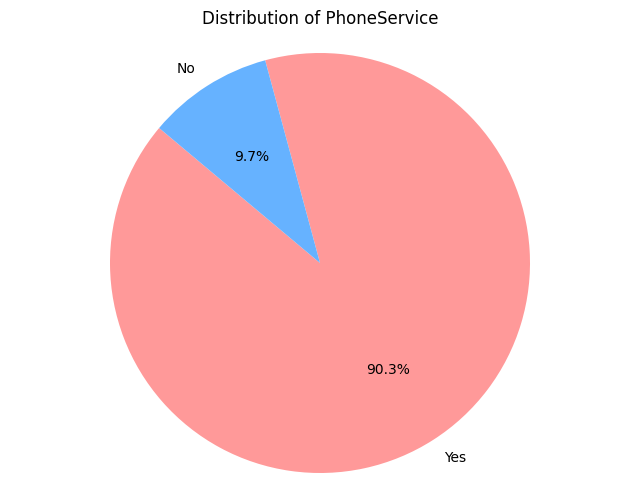

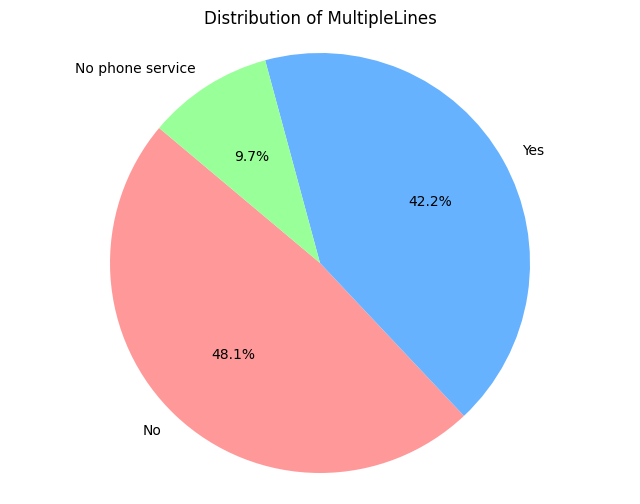

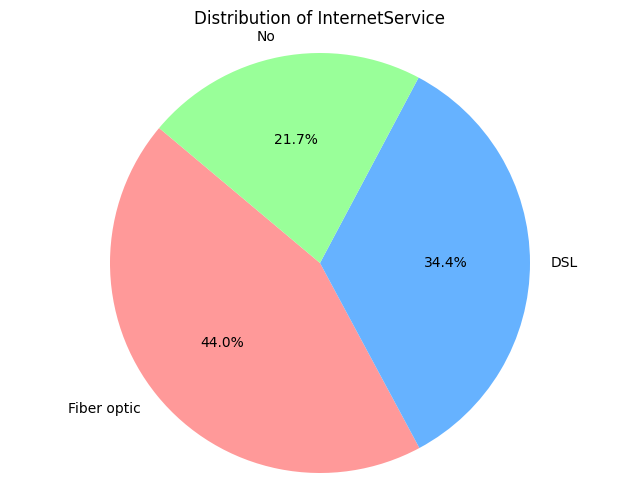

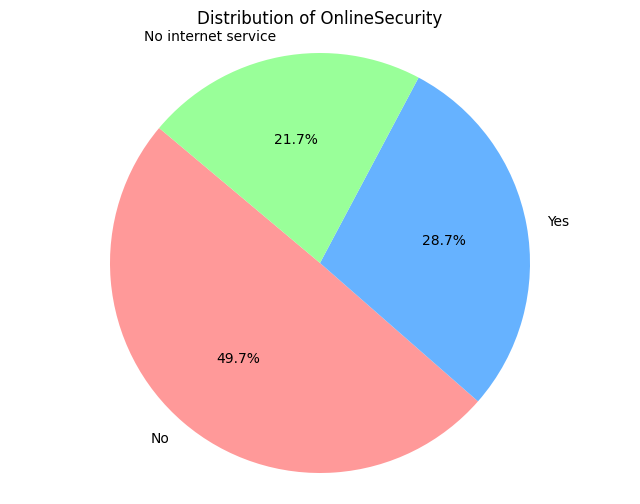

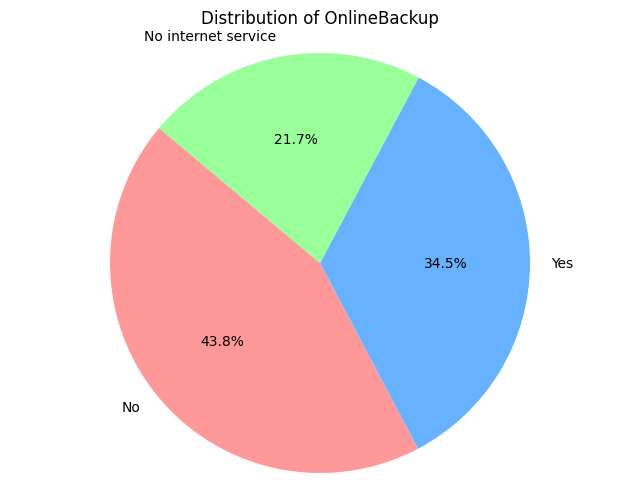

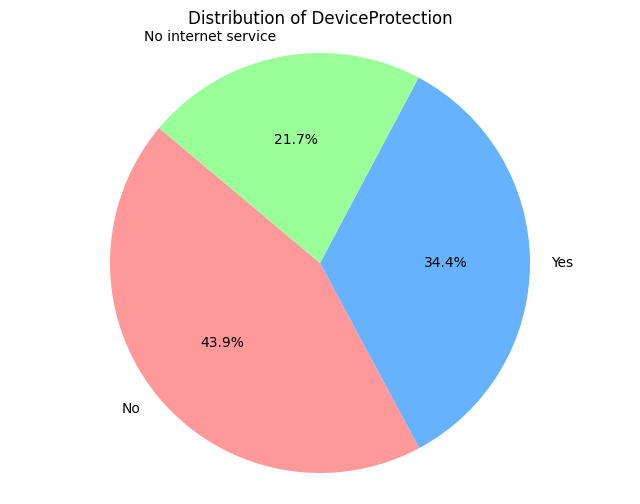

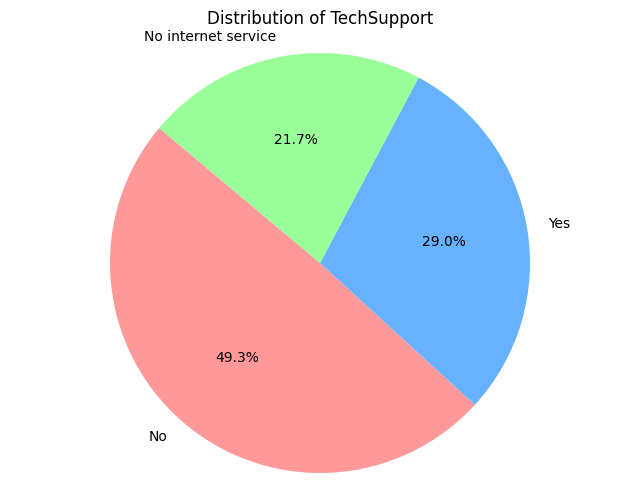

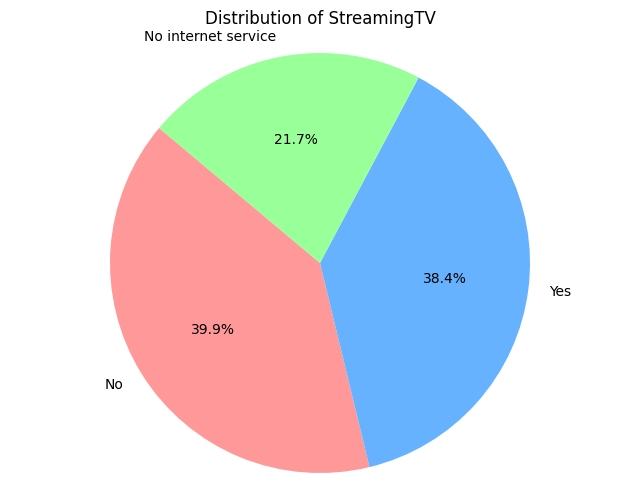

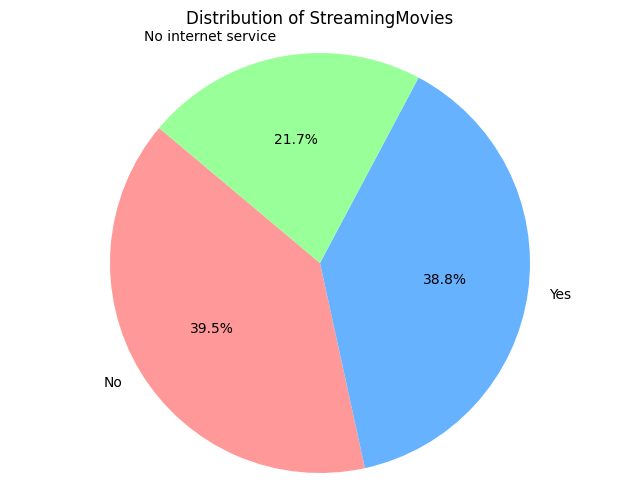

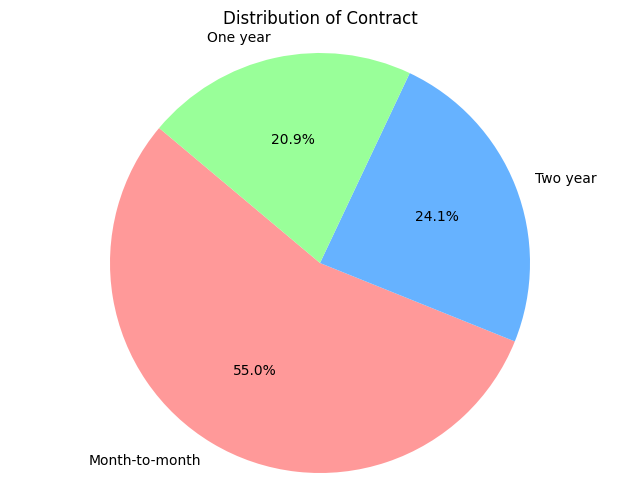

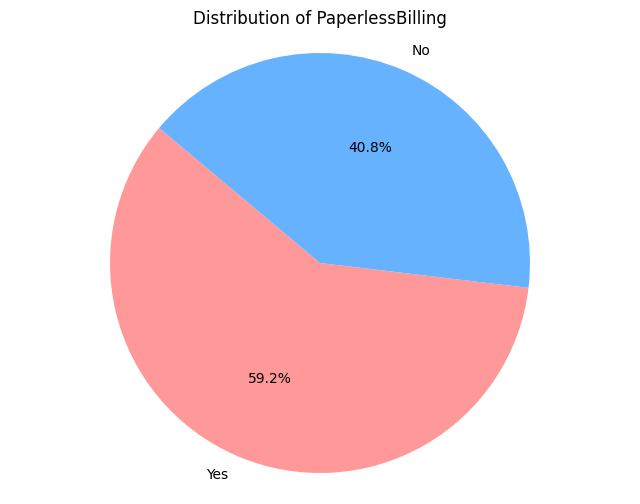

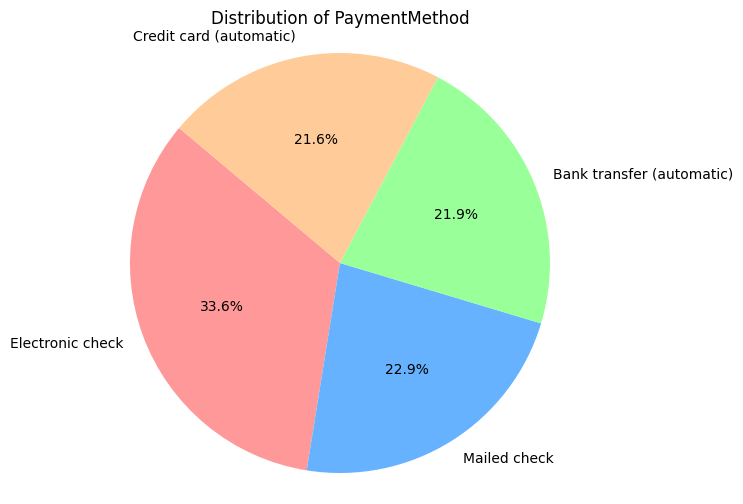

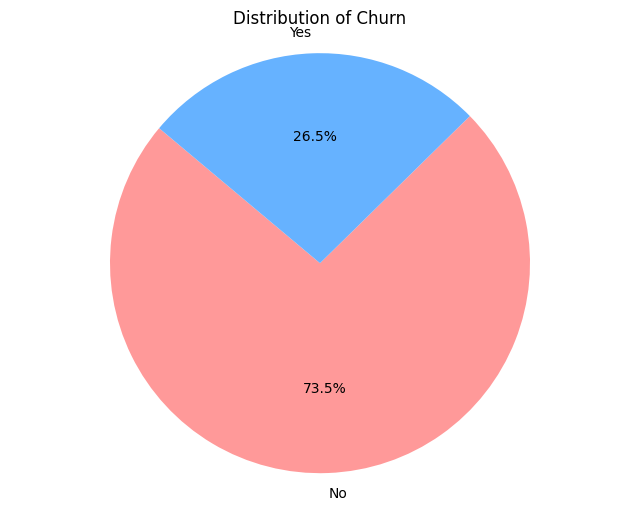

In [ ]:
plot_categorical_pie_charts(df)

Insights on pie charts

1. The customer base is almost equal among male and female
2. Electronic cheque is the most prefered payment option, followed by mail check. credit cards and bank transfers are equall prefered.
3. 70% customers dont have dependents but around 50% have partners
4. The probablity f customer churning is pretty low.
5.Customers have not shown any major interest in paperless billing, with 49% still usin paper bills.
6. Most consumers prefer their options open and opt for month to moth billing.
7. a swooping ~22% people dont have internet service, with almost equal preference in streaming movies in case of having internet connection.
8. Customers have also not shown a great interest in techsupport services with ~49% not signing up for it.
9. Similar trends were noticed in case of device protection, online backup and online protection with 40-45% opting out of it.
10. Customers have shown good interest in having internet services or DSL


Encode all the appropriate Categorical features with the best suitable approach

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':")
        print(unique_values)
        print("\n")

Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique values in 'gender':
['Female' 'Male']


Unique values in 'Partner':
['Yes' 'No']


Unique values in 'Dependents':
['No' 'Yes']


Unique values in 'PhoneService':
['No' 'Yes']


Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']


Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']


Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']


Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']


Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']


Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']


Unique values in 'StreamingTV':
['No' 'Yes' 'No internet service']


Unique values in 'StreamingMovies':
['No' 'Yes' 'No internet service']


Unique values in 'Contract':
['Month-to-month' 'One year' 'Two year']


Unique values in 'PaperlessBilling':
['Yes' 'No']


Unique values 

As a good practice I am splitting before encoding to avoid data leakage

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)  # Features
X=X.drop('customerID',axis=1)
y = df['Churn']  # Target variable
y=y.to_frame()
# Splitting the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - X shape:", X_train.shape, " y shape:", y_train.shape)
print("Test set - X shape:", X_test.shape, " y shape:", y_test.shape)

Training set - X shape: (5634, 19)  y shape: (5634, 1)
Test set - X shape: (1409, 19)  y shape: (1409, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['gender_encoded'] = label_encoder.fit_transform(X_train['gender'])
X_train = X_train.drop('gender',axis=1)
X_train['partner_encoded'] = label_encoder.fit_transform(X_train['Partner'])
X_train = X_train.drop('Partner',axis=1)
X_train['dependents_encoded'] = label_encoder.fit_transform(X_train['Dependents'])
X_train = X_train.drop('Dependents',axis=1)
X_train['phoneservice_encoded'] = label_encoder.fit_transform(X_train['PhoneService'])
X_train = X_train.drop('PhoneService',axis=1)
X_train['paperlessBilling_encoded'] = label_encoder.fit_transform(X_train['PaperlessBilling'])
X_train = X_train.drop('PaperlessBilling',axis=1)
X_test['gender_encoded'] = label_encoder.fit_transform(X_test['gender'])
X_test = X_test.drop('gender',axis=1)
X_test['partner_encoded'] = label_encoder.fit_transform(X_test['Partner'])
X_test = X_test.drop('Partner',axis=1)
X_test['dependents_encoded'] = label_encoder.fit_transform(X_test['Dependents'])
X_test = X_test.drop('Dependents',axis=1)
X_test['phoneservice_encoded'] = label_encoder.fit_transform(X_test['PhoneService'])
X_test = X_test.drop('PhoneService',axis=1)
X_test['paperlessBilling_encoded'] = label_encoder.fit_transform(X_test['PaperlessBilling'])
X_test = X_test.drop('PaperlessBilling',axis=1)

one_hot_encoded_IS = pd.get_dummies(X_train['InternetService'], prefix='InternetService')
one_hot_encoded_SM = pd.get_dummies(X_train['StreamingMovies'], prefix='StreamingMovies')
one_hot_encoded_ST = pd.get_dummies(X_train['StreamingTV'], prefix='StreamingTV')
one_hot_encoded_TS = pd.get_dummies(X_train['TechSupport'], prefix='TechSupport')
one_hot_encoded_DP = pd.get_dummies(X_train['DeviceProtection'], prefix='DeviceProtection')
one_hot_encoded_OB = pd.get_dummies(X_train['OnlineBackup'], prefix='OnlineBackup')
one_hot_encoded_OS = pd.get_dummies(X_train['OnlineSecurity'], prefix='OnlineSecurity')
one_hot_encoded_ML = pd.get_dummies(X_train['MultipleLines'], prefix='MultipleLines')
one_hot_encoded_PM = pd.get_dummies(X_train['PaymentMethod'], prefix='PaymentMethod')
X_train = pd.concat([X_train, one_hot_encoded_IS,one_hot_encoded_SM,one_hot_encoded_ST,one_hot_encoded_TS,one_hot_encoded_DP,one_hot_encoded_OS,one_hot_encoded_OB,one_hot_encoded_ML,one_hot_encoded_PM], axis=1)
one_hot_encoded_IS_2 = pd.get_dummies(X_test['InternetService'], prefix='InternetService')
one_hot_encoded_SM_2 = pd.get_dummies(X_test['StreamingMovies'], prefix='StreamingMovies')
one_hot_encoded_ST_2 = pd.get_dummies(X_test['StreamingTV'], prefix='StreamingTV')
one_hot_encoded_TS_2 = pd.get_dummies(X_test['TechSupport'], prefix='TechSupport')
one_hot_encoded_DP_2 = pd.get_dummies(X_test['DeviceProtection'], prefix='DeviceProtection')
one_hot_encoded_OB_2 = pd.get_dummies(X_test['OnlineBackup'], prefix='OnlineBackup')
one_hot_encoded_OS_2 = pd.get_dummies(X_test['OnlineSecurity'], prefix='OnlineSecurity')
one_hot_encoded_ML_2 = pd.get_dummies(X_test['MultipleLines'], prefix='MultipleLines')
one_hot_encoded_PM_2 = pd.get_dummies(X_test['PaymentMethod'], prefix='PaymentMethod')

X_test = pd.concat([X_test, one_hot_encoded_IS_2,one_hot_encoded_SM_2,one_hot_encoded_ST_2,one_hot_encoded_TS_2,one_hot_encoded_DP_2,one_hot_encoded_OS_2,one_hot_encoded_OB_2,one_hot_encoded_ML_2,one_hot_encoded_PM_2], axis=1)
for cols in ["InternetService","StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineBackup","OnlineSecurity","MultipleLines","PaymentMethod"]:
  X_train=X_train.drop(cols,axis=1)
  X_test=X_test.drop(cols,axis=1)
print("Training set - X shape:", X_train.shape, " y shape:", y_train.shape)
print("Test set - X shape:", X_test.shape, " y shape:", y_test.shape)
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
X_test['Contract_encoded'] = X_test['Contract'].map(contract_mapping)
X_train['Contract_encoded'] = X_train['Contract'].map(contract_mapping)
X_train=X_train.drop('Contract',axis=1)
X_test=X_test.drop('Contract',axis=1)


print(X_train.head())

Training set - X shape: (5634, 38)  y shape: (5634, 1)
Test set - X shape: (1409, 38)  y shape: (1409, 1)
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_encoded  \
2142              0    21.0           64.85       1336.80               0   
1623              0    54.0           97.20       5129.45               0   
6074              0     1.0           23.45         23.45               1   
1362              0     4.0           70.20        237.95               1   
6754              0     0.0           61.90           NaN               1   

      partner_encoded  dependents_encoded  phoneservice_encoded  \
2142                0                   1                     1   
1623                0                   0                     1   
6074                1                   0                     0   
1362                0                   0                     1   
6754                0                   1                     1   

      paperlessBilling_encod

In [ ]:
print("Training set - X shape:", X_train.shape, " y shape:", y_train.shape)
print("Test set - X shape:", X_test.shape, " y shape:", y_test.shape)

Training set - X shape: (5634, 38)  y shape: (5634, 1)
Test set - X shape: (7043, 38)  y shape: (1409, 1)


In [ ]:
y_train['churn'] = label_encoder.fit_transform(y_train['Churn'])
y_test['churn'] = label_encoder.fit_transform(y_test['Churn'])
y_train=y_train.drop('Churn',axis=1)
y_test=y_test.drop('Churn',axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


Train a model using Decision tree and check the performance of the model on train and test data

Train Accuracy: 0.9986
Test Accuracy: 0.7147


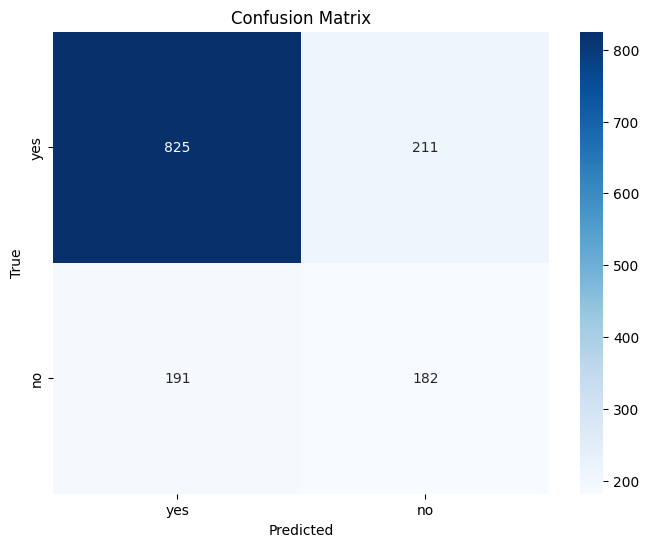

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
y_train = pd.DataFrame(imputer.fit_transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(imputer.fit_transform(y_test), columns=y_test.columns)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_confusion_matrix(y_test,test_predictions,["yes","no"])

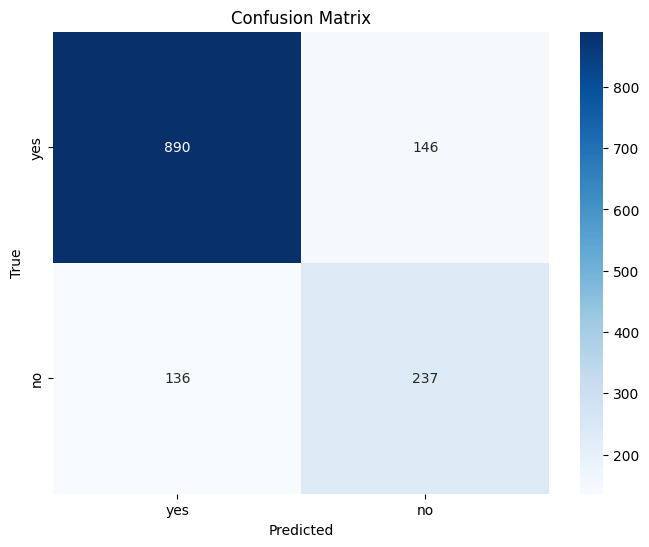

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.7998
Test Accuracy: 0.7999


In [ ]:
from sklearn.model_selection import  GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7,9, None],
    'min_samples_split': [2, 8, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV and fit it
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on train and test data
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
plot_confusion_matrix(y_test,test_predictions,["yes","no"])
print("Best Parameters:", best_params)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


The first model seems to be extremely overfit with train acuracy at 99% and test as 71% where as the second model is fine with both at around 79%

The overall performance according to confusion matrix is also better in second model

Model	  Sensitivity   Specificity

Model1	  0.819	      0.475

Model2	  0.796	      0.512
As you can see, Model 1 has a higher sensitivity than Model 2, meaning that it is better at correctly identifying true positive cases. However, Model 2 has a higher specificity than Model 1, meaning that it is better at correctly identifying true negative cases.

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


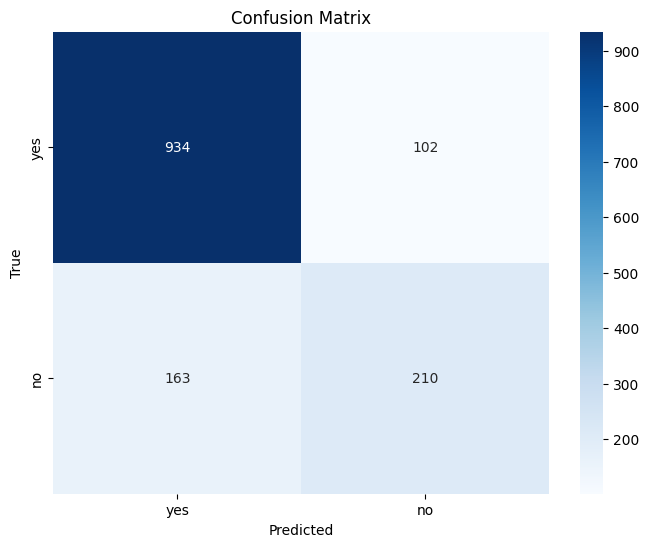

Training Accuracy: 0.8062
Test Accuracy: 0.8119


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the training set
train_predictions = adaboost_classifier.predict(X_train)

# Predict on the test set
test_predictions = adaboost_classifier.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
plot_confusion_matrix(y_test,test_predictions,["yes","no"])
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}


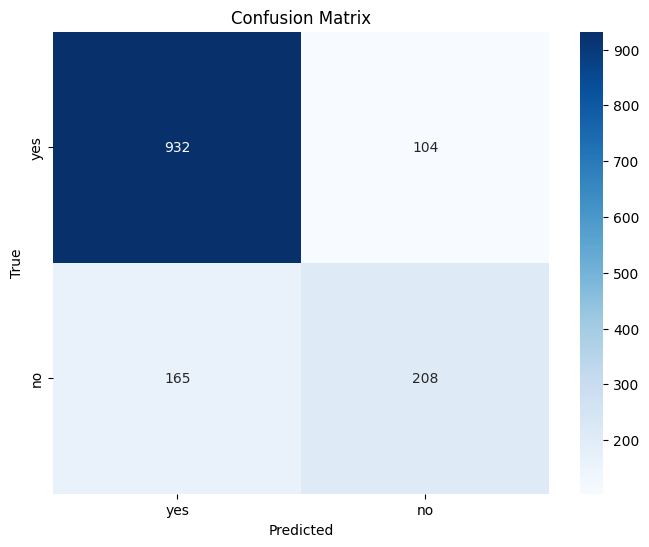

Train Accuracy: 0.8053
Test Accuracy: 0.8091


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01,0.5, 0.1, 1.0]  # Learning rate of the algorithm
}

# Create GridSearchCV and fit it
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on train and test data
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Best Parameters:", best_params)
plot_confusion_matrix(y_test,test_predictions,["yes","no"])
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Both the models have performed almost equally ell, there is no significant improvement.

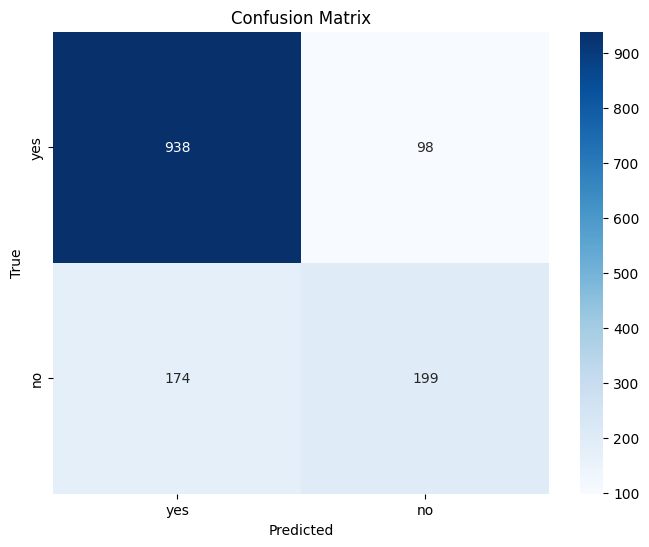

Training Accuracy: 0.8261
Test Accuracy: 0.8070


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gradientboost_classifier.fit(X_train, y_train)

# Predict on the training set
train_predictions = gradientboost_classifier.predict(X_train)

# Predict on the test set
test_predictions = gradientboost_classifier.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
plot_confusion_matrix(y_test,test_predictions,["yes","no"])
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


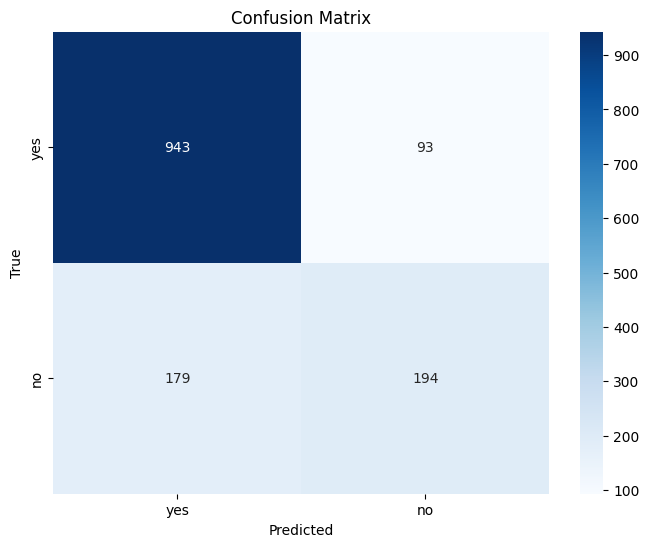

Train Accuracy: 0.8156
Test Accuracy: 0.8070


In [ ]:
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate of the algorithm
    'max_depth': [3, 5, 7]  # Maximum depth of the individual trees
}

# Create GridSearchCV and fit it
grid_search = GridSearchCV(estimator=gradientboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on train and test data
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Best Parameters:", best_params)
plot_confusion_matrix(y_test,test_predictions,["yes","no"])
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Once again there is no significant improvement, but the time taken is higher, implying higher computational cost.

From the above four models it is safe to assue that there is no significant improvement in the model performance by using grid search, given we are using a boosting mechanism for classifying. Whereas in case of just decision tree gridSearchCV can be seen as a requirement to find a model that doesn't overfit or underfit.

Another interesting observation is the above 4 models(boosted) there is not muh difference between accuracy of train and test data. This is a proof that ensemble techniques remove the risk of overfitting.


Model 1 has the highest test accuracy (0.8119) among the four models. It also has a high sensitivity (0.9015) and a moderate specificity (0.5630). This suggests that Model 1 is good at correctly identifying true positive cases (yes-yes) and true negative cases (no-no), but it may have a higher rate of false positive cases (no-yes) compared to the other models.

Model 3 has the highest training accuracy (0.8261) but the lowest test accuracy (0.8070). This suggests that Model 3 may have overfit the training data and does not generalize well to unseen data.

Model 2 and Model 4 have similar test accuracies (0.8091 and 0.8070, respectively) and specificities (0.5682 and 0.5604, respectively). However, Model 2 has a slightly higher sensitivity (0.9079) than Model 4 (0.8913). This suggests that Model 2 may be slightly better at correctly identifying true positive cases than Model 4.

Overall, Model 1 appears to be the best model based on its high test accuracy, sensitivity, and specificity.

Model comparision table

Model	Test Accuracy	Sensitivity	Specificity

Model1	0.8119	  0.9015	    0.5630

Model2	0.8091	  0.9079	    0.5682

Model3	0.8070	  0.8913	    0.5604

Model4	0.8070	  0.8837	    0.5625

From the above table it is clear that gridSearchCV has not provided significant improvement for the added complexity.

Also for this dataset Adaboosting did a better job than Gradientboosting